In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e22/sample_submission.csv
/kaggle/input/playground-series-s3e22/train.csv
/kaggle/input/playground-series-s3e22/test.csv


# Explore the data

1- Read the data

In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s3e22/train.csv")

In [3]:
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [4]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

In [37]:
df.shape

(1235, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

missing values rate

In [39]:
s = df.isnull().sum()
s.loc[s != 0] / 1235 * 100

temp_of_extremities       3.157895
peripheral_pulse          4.858300
mucous_membrane           1.700405
capillary_refill_time     0.485830
pain                      3.562753
peristalsis               1.619433
abdominal_distention      1.862348
nasogastric_tube          6.477733
nasogastric_reflux        1.700405
rectal_exam_feces        15.384615
abdomen                  17.246964
abdomo_appearance         3.886640
dtype: float64

In [40]:
s2 = s.loc[s != 0] / 1235 * 100
labels = list(s2.loc[s2 < 7].index)

In [41]:
list(s2.index)

['temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance']

# # Iteration 1

Let's start with a quick iteration by simply deleting the columns with missing values

In [42]:
len(df['id'].unique()) == df.shape[0]

True

There is also no need for the id column

In [43]:
df_iter1.apply(lambda x: len(x.unique()))

surgery                    2
age                        2
hospital_number          255
rectal_temp               43
pulse                     50
respiratory_rate          37
nasogastric_reflux_ph     26
packed_cell_volume        49
total_protein             83
abdomo_protein            54
surgical_lesion            2
lesion_1                  57
lesion_2                   4
lesion_3                   2
cp_data                    2
outcome                    3
dtype: int64

In [57]:
def iter1_cleaning(df):
    
    df.dropna(axis = 1, inplace = True)
    
    df.drop(['id'], axis = 1, inplace = True)
    
    print(df['age'].unique())
    d = {'age':{'adult':0, 'young':1}}
    df.replace(d, inplace = True)
    
    # binary values
    
    for c in ['cp_data', 'surgical_lesion', 'surgery']:
        df.replace({c:{'yes':1, 'no':0}}, inplace = True)
        
    d = {'outcome':{'lived':1, 'died':0, 'euthanized':2}}
    df.replace(d, inplace = True)

In [7]:
df_iter1 = df.copy()
iter1_cleaning(df_iter1)# changes are made 'inplace'

['adult' 'young']


In [46]:
df_iter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   int64  
 1   age                    1235 non-null   int64  
 2   hospital_number        1235 non-null   int64  
 3   rectal_temp            1235 non-null   float64
 4   pulse                  1235 non-null   float64
 5   respiratory_rate       1235 non-null   float64
 6   nasogastric_reflux_ph  1235 non-null   float64
 7   packed_cell_volume     1235 non-null   float64
 8   total_protein          1235 non-null   float64
 9   abdomo_protein         1235 non-null   float64
 10  surgical_lesion        1235 non-null   int64  
 11  lesion_1               1235 non-null   int64  
 12  lesion_2               1235 non-null   int64  
 13  lesion_3               1235 non-null   int64  
 14  cp_data                1235 non-null   int64  
 15  outc

Now we have all the data transformed into numerical features


# # Data Viz

Correlation matrix

In [47]:
# import modules
import matplotlib.pyplot as mp
import seaborn as sb

In [48]:
df_iter1.corr()['outcome']

surgery                 -0.124472
age                     -0.194634
hospital_number         -0.148588
rectal_temp             -0.022609
pulse                   -0.100572
respiratory_rate        -0.108867
nasogastric_reflux_ph   -0.340551
packed_cell_volume       0.041560
total_protein            0.457803
abdomo_protein          -0.247114
surgical_lesion         -0.198960
lesion_1                -0.025209
lesion_2                 0.064073
lesion_3                 0.035162
cp_data                 -0.187264
outcome                  1.000000
Name: outcome, dtype: float64

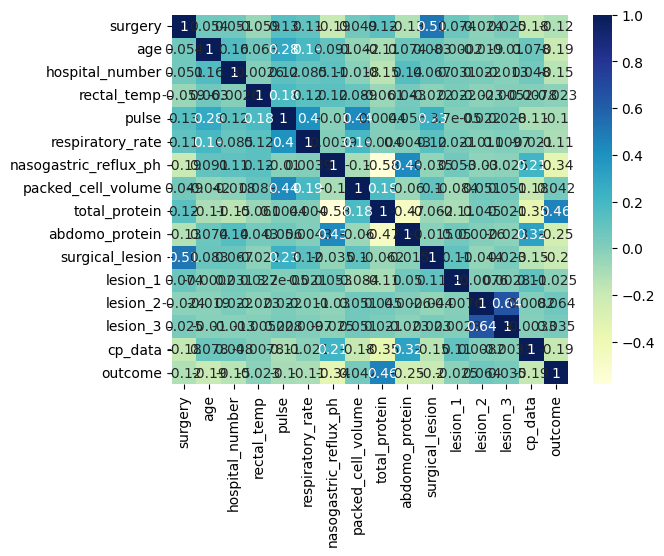

In [49]:
# plotting correlation heatmap
dataplot = sb.heatmap(df_iter1.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

Bar Plots for the Target variable

<Axes: xlabel='outcome', ylabel='count'>

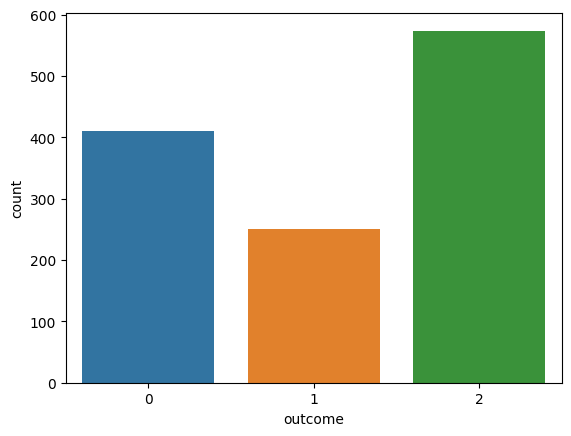

In [50]:
sb.barplot(data=df_iter1, x="outcome", y=df_iter1['outcome'].value_counts())

# Machine Learning

In [8]:
X = df_iter1.drop(['outcome'], axis = 1)
y = df_iter1['outcome']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# # **Random Forest**

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf_clf = RandomForestClassifier()

In [13]:
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [14]:
from sklearn.metrics import f1_score

In [15]:
f1_score(y_test, y_pred, average = 'micro')

0.7055016181229773

Hyperparamaters tuning

In [60]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

**Hyperparameter Tuning- GridSearchCV**

In [61]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 3, 6, 9],
    'max_leaf_nodes': [None, 3, 6, 9]
}

In [62]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, n_estimators=150)


In [75]:
rf_grid = RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=150)
rf_clf.fit(X_train, y_train)
y_pred_rf_grid = rf_clf.predict(X_test)

In [76]:
f1_score(y_test, y_pred_rf_grid, average = 'micro')

0.6634304207119741

In [64]:
rf_grid = RandomForestClassifier(max_depth=9)
rf_clf.fit(X_train, y_train)
y_pred_rf_grid = rf_clf.predict(X_test)

In [65]:
f1_score(y_test, y_pred_rf_grid, average = 'micro')

0.6537216828478964

# # **X_GBoost**

In [16]:
import xgboost as xgb


In [17]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

In [18]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [19]:
y_pred_xgb = xgb_model.predict(X_test)

In [70]:
y_pred_xgb

array([1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1,
       0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1,
       2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 1,
       2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1,
       1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2,

In [20]:
f1_score(y_test, y_pred_xgb, average = 'micro')

0.7055016181229773

# Submition

In [21]:
df_test = pd.read_csv("/kaggle/input/playground-series-s3e22/test.csv")
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     824 non-null    int64  
 1   surgery                824 non-null    object 
 2   age                    824 non-null    object 
 3   hospital_number        824 non-null    int64  
 4   rectal_temp            824 non-null    float64
 5   pulse                  824 non-null    float64
 6   respiratory_rate       824 non-null    float64
 7   temp_of_extremities    789 non-null    object 
 8   peripheral_pulse       777 non-null    object 
 9   mucous_membrane        811 non-null    object 
 10  capillary_refill_time  818 non-null    object 
 11  pain                   795 non-null    object 
 12  peristalsis            805 non-null    object 
 13  abdominal_distention   802 non-null    object 
 14  nasogastric_tube       760 non-null    object 
 15  nasoga

In [73]:
s_test = df_test.isnull().sum()
s_test.loc[s_test != 0]

temp_of_extremities       35
peripheral_pulse          47
mucous_membrane           13
capillary_refill_time      6
pain                      29
peristalsis               19
abdominal_distention      22
nasogastric_tube          64
nasogastric_reflux        14
rectal_exam_feces        125
abdomen                  154
abdomo_appearance         31
dtype: int64

We note that the columns with missing values are the same in train and test dataset

In [59]:
iter1_cleaning(df_test)# changes are made 'inplace'

['adult' 'young']


let's choose the best model and re-train with the whole dataset this time, before testing on the submition dataset

In [60]:
df_test.shape

(824, 15)

In [32]:
X.shape

(1235, 15)

In [26]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X, y)

RandomForestClassifier()

In [33]:
y_submit = rf_clf.predict(df_test)

In [34]:
y_submit

array([1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1,
       0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1,
       1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1,
       1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,

Transform the results to submission format

In [55]:
df_test = pd.read_csv("/kaggle/input/playground-series-s3e22/test.csv")

In [56]:
df_test.id.values.shape

(824,)

In [52]:
data = {'id':df_test.id.values, 'outcome': y_submit}

In [53]:
sub = pd.DataFrame(data=data)

In [54]:
sub

,id,outcome
0,1235,1
1,1236,1
2,1237,1
3,1238,2
4,1239,1
...,...,...
819,2054,0
820,2055,2
821,2056,0
822,2057,1


In [61]:
d = {'outcome':{1:'lived', 0:'died', 2:'euthanized'}}

In [62]:
sub.replace(d, inplace=True)

In [67]:
sub.to_csv("submission.csv", index=False)

,id,outcome
0,1235,lived
1,1236,lived
2,1237,lived
3,1238,euthanized
4,1239,lived
...,...,...
819,2054,died
820,2055,euthanized
821,2056,died
822,2057,lived
